In [220]:
import pandas as pd
import numpy as np
import seaborn as sb
import glob
import multiprocessing
import os
%matplotlib inline

In [224]:
files = glob.glob('/home/shared/Data/encode/mouse/heart/TADs/*')

In [225]:
p = multiprocessing.Pool(64)

In [223]:
p.close()

In [41]:
def get_df(d):
    enh_gene_df = pd.read_csv(d,sep='\t',index_col=0)
    return enh_gene_df

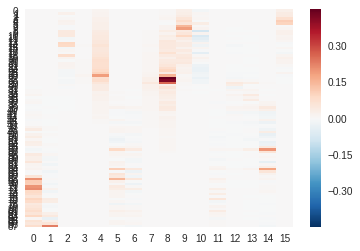

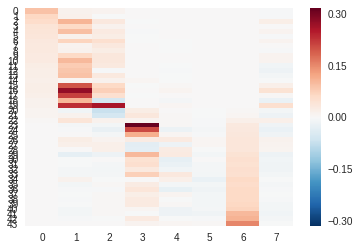

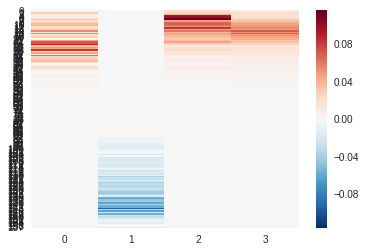

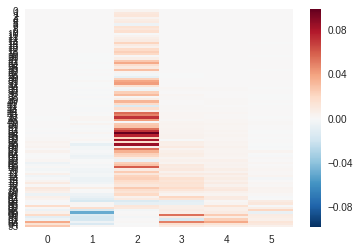

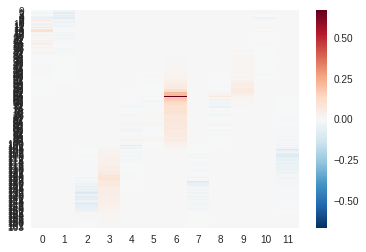

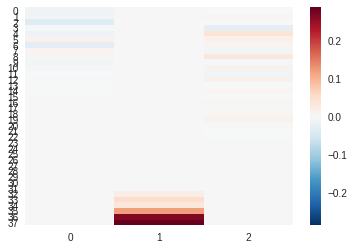

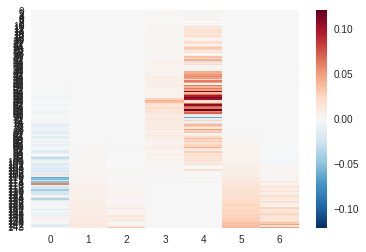

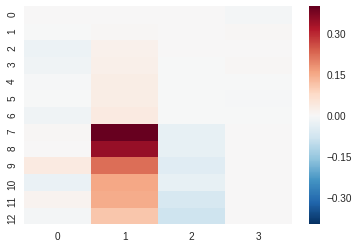

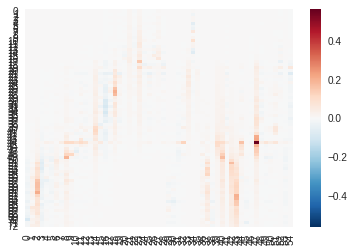

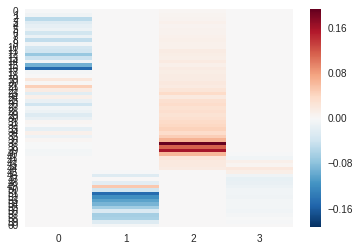

In [26]:
count = 0
for file in files:
    # print(file)
    tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file))
    sample_df = pd.read_csv(tad_files[0],sep='\t',index_col=0)
    dfs = []
    for c in tad_files:
        dfs.append(np.array(get_df(c)))
    
    median = pd.DataFrame(np.median(dfs,axis=0))
    mean = pd.DataFrame(np.mean(dfs, axis=0))
    median.index = sample_df.index
    mean.index = sample_df.index
    median.columns = sample_df.columns
    mean.columns = mean.columns
    count += 1
    sb.plt.figure(count)
    diff = np.array(mfor file in tad_dirs:
    tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file)) 
    for indx,c in enumerate(tad_files):
        if indx == 0:
            sum_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
            
        else:
            other_enh_gene = pd.read_csv(c, sep='\t',index_col=0)
            sum_enh_gene += other_enh_gene
            
    
    expected = sum_enh_gene/len(tad_files)

    for c in tad_files:
        c_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        w_enh_gene = np.arctan(c_enh_gene - expected)
        #path = c.split('.txt')[0]
        #w_enh_gene.to_csv('{}_minus_expected_arctan.txt'.format(path),sep='\t')
        sb.heatmap(w_enh_gene)
        break
    breakean)-np.array(median)
    sb.heatmap(diff)
    
    if count == 10:
        break
    

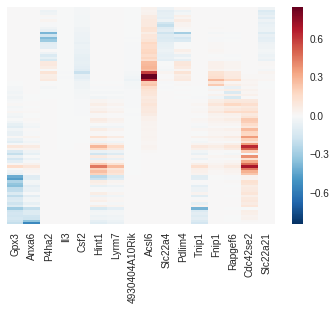

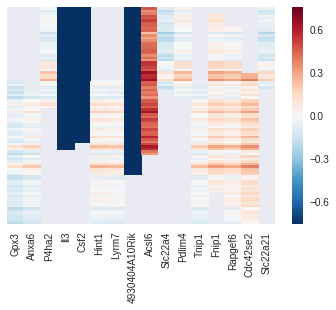

In [6]:

for file in files:
    tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file)) 
    for indx,c in enumerate(tad_files):
        if indx == 0:
            sum_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
            
        else:
            other_enh_gene = pd.read_csv(c, sep='\t',index_col=0)
            sum_enh_gene += other_enh_gene
            
    
    expected = sum_enh_gene/len(tad_files)

    for c in tad_files:
        c_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        w_enh_gene = np.tanh(c_enh_gene - expected)
        w_enh_gene2 = np.tanh((c_enh_gene - expected)/expected)
        #path = c.split('.txt')[0]
        #w_enh_gene.to_csv('{}_minus_expected_arctan.txt'.format(path),sep='\t')
        sb.plt.figure(1)
        sb.heatmap(w_enh_gene,yticklabels=False)
        sb.plt.figure(2)
        sb.heatmap(w_enh_gene2,yticklabels=False)
        break
    break

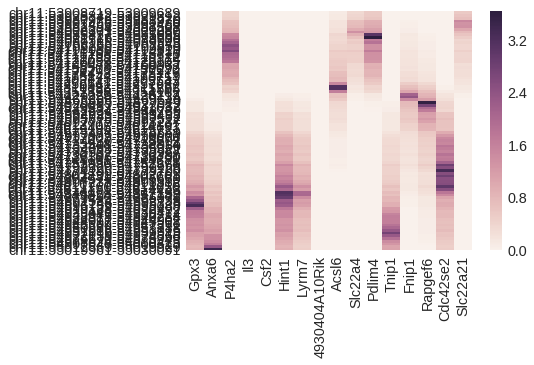

In [19]:
sb.heatmap(c_enh_gene)

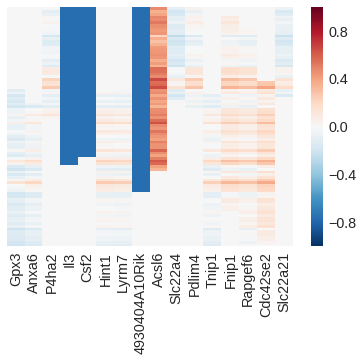

In [16]:
sb.heatmap(np.tanh(((c_enh_gene - expected)/expected).fillna(0)),yticklabels=False,vmin=-1,vmax=1)

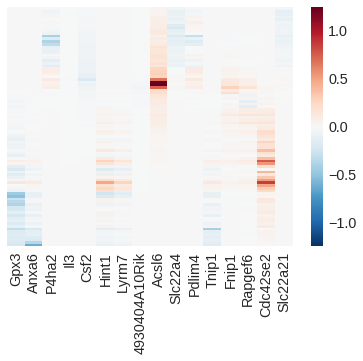

In [18]:
sb.heatmap(c_enh_gene-expected,yticklabels=False)

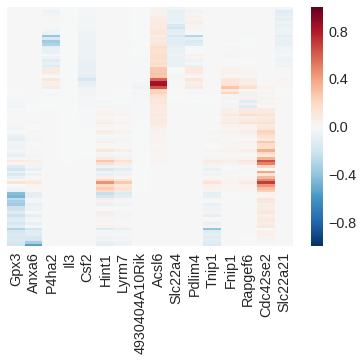

In [17]:
sb.heatmap(np.tanh(c_enh_gene-expected),yticklabels=False,vmin=-1,vmax=1)

In [9]:
def get_distance_df(gene_df,enh_df):
    enh_pos = []
    for r in enh_df.iterrows():
        pos = "{}:{}-{}".format(r[1][0],r[1][1],r[1][2])
        enh_pos.append(pos)
    gene_names = list(gene_df[3])
    out_d = pd.DataFrame(0,index=enh_pos,columns=gene_names)
    for g in gene_df.iterrows():
        name = g[1][3]
        if g[1][5] == '-':
            g_start = g[1][2]
        else:
            g_start = g[1][1]
        for e in enh_df.iterrows():
            e_pos = "{}:{}-{}".format(e[1][0],e[1][1],e[1][2])
            e_mid = e[1][1]+((e[1][2]-e[1][1])/2)
            d = np.abs(g_start - e_mid)
            out_d.ix[e_pos,name] = int(d)
    return out_d

def get_distance_based_weight(distance):
    ##set weight 0 for distance greater than 500 kb
    distance[distance > 500000] = 1e10000
    dist_weight = 1/np.log2(distance)
    if set(dist_weight.values.flatten()) == {0}:
        wmin = np.sort(list(set(dist_weight.values.flatten())))[0]
        wmax = np.sort(list(set(dist_weight.values.flatten())))[0]
        scaled_dist_weight = dist_weight
    else:
        wmin = np.sort(list(set(dist_weight.values.flatten())))[1]
        wmax = np.sort(list(set(dist_weight.values.flatten())))[-1]
        scaled_dist_weight = (dist_weight-wmin)/(wmax-wmin)
        scaled_dist_weight[scaled_dist_weight<0] = 0
    return(scaled_dist_weight)

In [10]:
enh_df = pd.read_csv('{}/enh.bed'.format(file),sep='\t',header=None)
gene_df = pd.read_csv('{}/gene.bed'.format(file),sep='\t',header=None)

In [11]:
enh_gene_dist = get_distance_df(gene_df,enh_df)

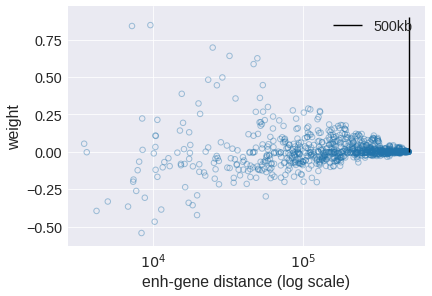

In [23]:
sb.set_context('paper',font_scale=1.8)
sb.plt.scatter(enh_gene_dist.values.flatten(),np.tanh(c_enh_gene-expected).values.flatten(),edgecolors='#2374AB',facecolors='none',s=30,linewidths=1,alpha=0.4)
sb.plt.xscale('log')
sb.plt.vlines(500000,0,0.9,label='500kb')
sb.plt.xlabel('enh-gene distance (log scale)')
sb.plt.ylabel('weight')
sb.plt.legend()

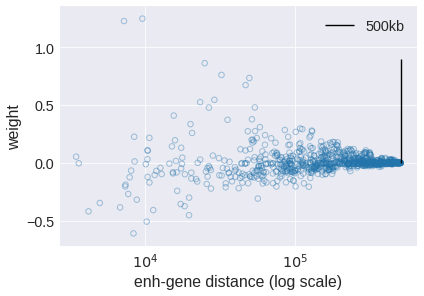

In [14]:
sb.set_context('paper',font_scale=1.8)
sb.plt.scatter(enh_gene_dist.values.flatten(),(c_enh_gene-expected).values.flatten(),edgecolors='#2374AB',facecolors='none',s=30,linewidths=1,alpha=0.4)
sb.plt.xscale('log')
sb.plt.vlines(500000,0,0.9,label='500kb')
sb.plt.xlabel('enh-gene distance (log scale)')
sb.plt.ylabel('weight')
sb.plt.legend()

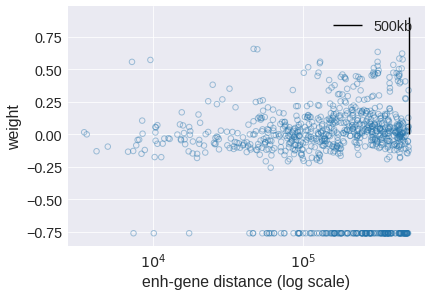

In [34]:
sb.set_context('paper',font_scale=1.8)
sb.plt.scatter(enh_gene_dist.values.flatten(),np.tanh((c_enh_gene-expected)/expected).values.flatten(),edgecolors='#2374AB',facecolors='none',s=30,linewidths=1,alpha=0.4)
sb.plt.xscale('log')
sb.plt.vlines(500000,0,0.9,label='500kb')
sb.plt.xlabel('enh-gene distance (log scale)')
sb.plt.ylabel('weight')
sb.plt.legend()

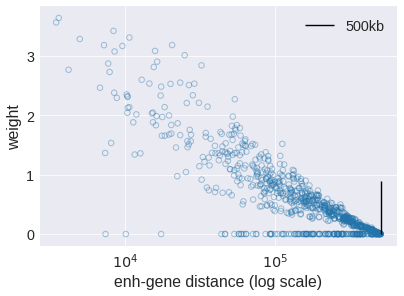

In [20]:
sb.set_context('paper',font_scale=1.8)
sb.plt.scatter(enh_gene_dist.values.flatten(),c_enh_gene.values.flatten(),edgecolors='#2374AB',facecolors='none',s=30,linewidths=1,alpha=0.4)
sb.plt.xscale('log')
sb.plt.vlines(500000,0,0.9,label='500kb')
sb.plt.xlabel('enh-gene distance (log scale)')
sb.plt.ylabel('weight')
sb.plt.legend()

In [13]:
scaled_weight = get_distance_based_weight(enh_gene_dist)

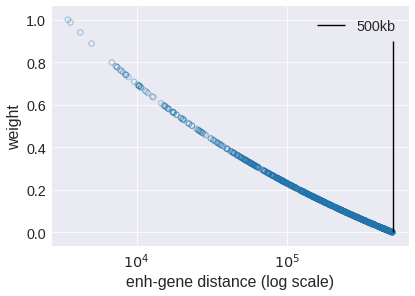

In [33]:
sb.set_context('paper',font_scale=1.8)
sb.plt.scatter(enh_gene_dist.values.flatten(),scaled_weight.values.flatten(),edgecolors='#2374AB',facecolors='none',s=30,linewidths=1,alpha=0.4)
sb.plt.xscale('log')
sb.plt.vlines(500000,0,0.9,label='500kb')
sb.plt.xlabel('enh-gene distance (log scale)')
sb.plt.ylabel('weight')
sb.plt.legend()

## Selecting highly variable TAD regions

In [65]:
def get_vars(tup):
    file,threshold = tup
    tad = file.split('/')[-1]
    tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file)) 
    
    if len(tad_files) == 0:
        return (tad, 0, 0, 0)
    for indx,c in enumerate(tad_files):
        if indx == 0:
            sum_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        else:
            other_enh_gene = pd.read_csv(c, sep='\t',index_col=0)
            sum_enh_gene += other_enh_gene

    expected = sum_enh_gene/len(tad_files)
    seq = []
    for c in tad_files:
        c_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        tanh_enh_gene = np.tanh(c_enh_gene-expected)
        seq.append(np.array(tanh_enh_gene))
    #flat_list = [val for sublist in seq for val in sublist]
    tad = file.split('/')[-1]
    all_vars_df = pd.DataFrame(np.var(seq,axis=0))
    all_vars_df.index = tanh_enh_gene.index
    all_vars_df.columns = tanh_enh_gene.columns
    all_vars = all_vars_df.values.flatten()
    count_vars_above_thresh = np.sum(all_vars >= threshold)
    t_count = len(all_vars)
    prop = count_vars_above_thresh/t_count
    
    return (expected,c_enh_gene,tad,count_vars_above_thresh,t_count,prop)
    


In [7]:
import multiprocessing

p = multiprocessing.Pool(64)

In [7]:
var_thresh = np.array(list(map(float,list(range(0,52,2)))))/100

In [8]:
var_thresh

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ])

In [9]:
thresh_percents = []
for thresh in var_thresh:
    input_l = list(zip(files,[thresh]*len(files)))
    out = p.map(get_vars, input_l)
    var_df = pd.DataFrame(out)
    percent = (var_df[1].sum()/var_df[2].sum())*100
    thresh_percents.append((thresh,percent))

In [11]:
thresh_percents_dfs = pd.DataFrame(thresh_percents)

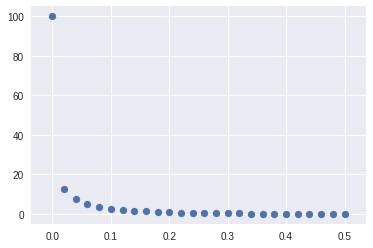

In [12]:
sb.plt.scatter(thresh_percents_dfs[0],thresh_percents_dfs[1])

## Tissue specific enhancers variability

In [17]:
tissue_specificity = pd.read_excel('/home/shared/Data/encode/mouse/166652-6.xlsx',skiprows=1)

In [22]:
tissue_specificity['Results Summary, Predicted Tissue (reproducibility)']

,Tissue,H3K27ac Rank,VISTA ID,Element Name,mm10 Coordinates,"Results Summary, Predicted Tissue (reproducibility)",Additional Tissues With Reprodicible Staining (reproducibility)
0,Forebrain,3,mm1605,mEN881,chr13:34147928-34150988,other positive,"Lb (3/5), Mb (3/5), Hb (3/5), facial mesenchym..."
1,Forebrain,4,mm1684,mEN882,chr4:128714414-128717015,Fb positive (6/6),"Mb (6/6), Hb(6/6), neural tube (6/6), eye (4/6..."
2,Forebrain,8,mm1606,mEN886,chr12:111691971-111695499,Fb positive (6/6),"Mb (6/6), Hb (6/6), neural tube (6/6)"
3,Forebrain,10,mm1607,mEN888,chr5:125392751-125395599,Fb positive (5/7),"Lb (3/7), skin (3/7)"
4,Forebrain,12,mm1673,mEN890,chr2:157473505-157477397,other positive,somites (3/6)
5,Forebrain,14,mm1674,mEN892,chr8:120423908-120427305,Fb positive (4/6),"Lb (3/6), Mb (5/6), Hb (3/6), nose (4/6), eye ..."
6,Forebrain,17,mm1608,mEN895,chr9:41734978-41737961,Fb positive (6/6),"Mb (6/6), Hb (6/6), facial mesenchyme (6/6), n..."
7,Forebrain,18,mm1675,mEN896,chr11:96901713-96904671,other positive,"Hb (5/7), neural tube (5/7)"
8,Forebrain,19,mm1676,mEN897,chr12:86800344-86803636,negative,NaN
9,Forebrain,20,mm1609,mEN898,chr12:27060074-27063099,other positive,Mb (3/5)


In [26]:
enh_tissue_specific = []
enh_not_specific = []
for r in tissue_specificity.iterrows():
    pos = r[1]['mm10 Coordinates']
    res = r[1]['Results Summary, Predicted Tissue (reproducibility)']
    if res in ['other positive', 'negative']:
        chrom = pos.split(':')[0]
        start,stop = pos.split(':')[1].split('-')
        enh_not_specific.append((chrom,start,stop))
    
    else:

        chrom = pos.split(':')[0]
        start,stop = pos.split(':')[1].split('-')
        enh_tissue_specific.append((chrom,start,stop))
    

In [29]:
enh_not_specific_df = pd.DataFrame(enh_not_specific)
enh_tissue_specific_df = pd.DataFrame(enh_tissue_specific)

In [42]:
enh_not_specific_df.to_csv('/home/shared/Data/encode/mouse/enhancer/enh_not_specific.bed',sep='\t',index=None,header=None)

In [43]:
enh_tissue_specific_df.to_csv('/home/shared/Data/encode/mouse/enhancer/enh_tissue_specific.bed',sep='\t',index=None,header=None)

In [3]:
tad_tissue_specific_enh = pd.read_csv('/home/shared/Data/encode/mouse/enhancer/tad_enh_tissue_specific.bed',sep='\t',header=None)
tad_not_specific_enh = pd.read_csv('/home/shared/Data/encode/mouse/enhancer/tad_enh_not_tissue_specific.bed',sep='\t',header=None)

not_specific_enh_list = []
for r in tad_not_specific_enh.iterrows():
    not_specific_enh_list.append('{}:{}-{}'.format(r[1][0],r[1][1],r[1][2]))
specific_enh_list = []
for r in tad_tissue_specific_enh.iterrows():
    specific_enh_list.append('{}:{}-{}'.format(r[1][0],r[1][1],r[1][2]))

In [4]:
def get_vars_tissue_specific(tup):
    file,threshold,enh_set = tup
    tad = file.split('/')[-1]
    tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file)) 
    
    if len(tad_files) == 0:
        return (tad, 0, 0, 0)
    for indx,c in enumerate(tad_files):
        if indx == 0:
            sum_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        else:
            other_enh_gene = pd.read_csv(c, sep='\t',index_col=0)
            sum_enh_gene += other_enh_gene
    
    expected = sum_enh_gene/len(tad_files)
    enh_set = [e for e in expected.index if e in enh_set]
    if len(enh_set) == 0:
        return (tad, 0, 0, 0)
    
    expected = expected.ix[enh_set,:]
    seq = []
    for c in tad_files:
        c_enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        c_enh_gene = c_enh_gene.ix[enh_set,:]
        tanh_enh_gene = np.tanh(c_enh_gene-expected)
        seq.append(np.array(tanh_enh_gene))
    #flat_list = [val for sublist in seq for val in sublist]
    tad = file.split('/')[-1]
    all_vars_df = pd.DataFrame(np.var(seq,axis=0))
    all_vars_df.index = tanh_enh_gene.index
    all_vars_df.columns = tanh_enh_gene.columns
    all_vars = all_vars_df.values.flatten()
    count_vars_above_thresh = np.sum(all_vars >= threshold)
    t_count = len(all_vars)
    prop = count_vars_above_thresh/t_count
    
    return (tad,count_vars_above_thresh,t_count,prop)
    

In [5]:
 input_l = list(zip(files,[thresh]*len(files),[specific_enh_list]*len(files)))

NameError: name 'thresh' is not defined

In [100]:
get_vars_tissue_specific(input_l[2])

('TAD_1338', 4, 4, 1.0)

In [13]:
import multiprocessing

p = multiprocessing.Pool(64)

var_thresh = np.array(list(map(float,list(range(0,12,2)))))/100
thresh_percents = []
for thresh in var_thresh:
    input_l = list(zip(files,[thresh]*len(files),[specific_enh_list]*len(files)))
    out = p.map(get_vars_tissue_specific, input_l)
    var_df = pd.DataFrame(out)
    percent = (var_df[1].sum()/var_df[2].sum())*100
    thresh_percents.append((thresh,percent))

In [14]:
p.close()

In [15]:
thresh_percents

[(0.0, 100.0),
 (0.02, 9.4713656387665193),
 (0.040000000000000001, 5.8370044052863435),
 (0.059999999999999998, 3.5242290748898681),
 (0.080000000000000002, 2.9735682819383258),
 (0.10000000000000001, 2.3127753303964758)]

In [16]:
var_df

,0,1,2,3
0,TAD_268,0,0,0.0
1,TAD_364,0,0,0.0
2,TAD_1338,0,4,0.0
3,TAD_237,0,0,0.0
4,TAD_1545,0,0,0.0
5,TAD_15,0,0,0.0
6,TAD_442,0,0,0.0
7,TAD_8,0,0,0.0
8,TAD_1483,0,0,0.0
9,TAD_741,0,0,0.0


In [68]:
expected,enh_gene_df,val1,val2,val3,val4 = get_vars(input_l[0])

In [80]:
[e for e in expected.index if e in specific_enh_list]

['chr11:53908719-53909689']

In [79]:
specific_enh_list.append(expected.index[0])

In [64]:
expected

NameError: name 'expected' is not defined

In [82]:
tad_tissue_specific_enh = pd.read_csv('/home/shared/Data/encode/mouse/enhancer/tad_enh_tissue_specific.bed',sep='\t',header=None)
tad_not_specific_enh = pd.read_csv('/home/shared/Data/encode/mouse/enhancer/tad_enh_not_tissue_specific.bed',sep='\t',header=None)

not_specific_enh_list = []
for r in tad_not_specific_enh.iterrows():
    not_specific_enh_list.append('{}:{}-{}'.format(r[1][0],r[1][1],r[1][2]))
specific_enh_list = []
for r in tad_tissue_specific_enh.iterrows():
    specific_enh_list.append('{}:{}-{}'.format(r[1][0],r[1][1],r[1][2]))

In [48]:
tad_tissue_specific_enh

,0,1,2
0,chr11,118236218,118241366
1,chr11,52875749,52879297
2,chr12,111689454,111697408
3,chr14,21358823,21360460
4,chr14,25582157,25591207
5,chr15,64233309,64236194
6,chr15,73019470,73023612
7,chr15,77793187,77808135
8,chr16,17802808,17811287
9,chr16,90449165,90451215


In [6]:
out = p.map(get_vars, files)

In [10]:
var_df = pd.DataFrame(out)

In [19]:
var_df[3] = var_df[1]/var_df[2]

In [22]:
var_df = var_df.fillna(0)

(array([ 563.,  550.,  296.,  122.,   65.,   34.,   28.,   13.,    5.,    3.]),
 array([ 0.   ,  0.065,  0.13 ,  0.195,  0.26 ,  0.325,  0.39 ,  0.455,
         0.52 ,  0.585,  0.65 ]),
 <a list of 10 Patch objects>)

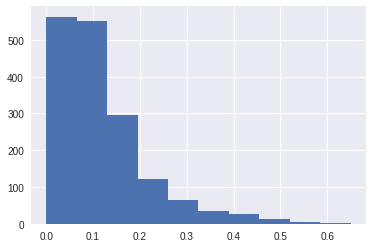

In [23]:
sb.plt.hist(var_df[3])

In [25]:
file = files[101]
tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file))

In [27]:

get_vars()

('TAD_998', 117, 948)

In [21]:
p.close()

(array([ 494.,   81.,   56.,   31.,   32.,   16.,   19.,   11.,    4.,
           4.,    4.,    8.,    7.,    4.,    8.,    4.,    7.,    2.,
           5.,    4.,    4.,    6.,    4.,    1.,    4.,    0.,    2.,
           1.,    0.,    3.,    0.,    2.,    1.,    2.,    3.,    1.,
           0.,    0.,    1.,    1.,    0.,    2.,    1.,    0.,    1.,
           1.,    0.,    0.,    0.,    2.,    1.,    2.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           1.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    2.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.        ,  0.00299186,  0.00598373,  0.00897559,  0.01196745,
         0.01495932,  0.01795118,  0.02094304,  0.02393491,  0.02692677,
         0.02991863,  0.0329105 ,  0.03590236,  0.03889423,  0.0

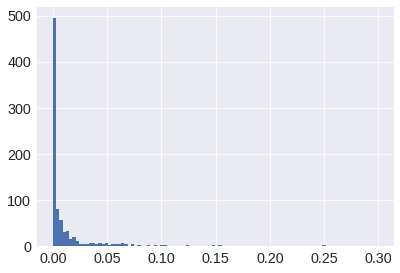

In [153]:
sb.plt.hist(all_vars,bins=100)

In [133]:
pd.DataFrame(tad_avg_vars).sort_values(by=1)

,0,1
7,TAD_8,0.425655
8,TAD_1483,0.627783
5,TAD_15,0.785634
3,TAD_237,0.805898
1,TAD_364,0.948953
0,TAD_268,1.008881
4,TAD_1545,1.083251
6,TAD_442,1.126936
9,TAD_741,1.312782
2,TAD_1338,1.483760


In [134]:
pd.DataFrame(tad_max_vars).sort_values(by=1)

,0,1
5,TAD_15,1.138040
7,TAD_8,1.378604
2,TAD_1338,1.845800
8,TAD_1483,2.559725
0,TAD_268,2.810743
9,TAD_741,3.250542
3,TAD_237,3.268286
1,TAD_364,3.655739
4,TAD_1545,4.428747
6,TAD_442,4.615217


In [121]:
file.split('/')[-1]

'TAD_268'

In [59]:
import scipy

In [61]:
scipy.stats.normaltest(np.random.normal(size=1000))

NormaltestResult(statistic=1.8601625065734209, pvalue=0.39452165288825525)

In [118]:
seq[0].shape[1]

16

In [113]:
pd.DataFrame(np.var(seq,axis=0)).sum(axis=0).sum()/16

1.0088805838022217

In [83]:
np.var(np.array([[1,3,2],[0,0,0]]))

1.3333333333333333

In [86]:
np.var(np.array([[1,3,2],[0,0,0]]),axis=0)

array([ 0.25,  2.25,  1.  ])

(array([  11.,   51.,  136.,  484.,  248.,   85.,   31.,    7.,    2.,    1.]),
 array([-15.62850819, -11.50310355,  -7.37769891,  -3.25229427,
          0.87311037,   4.99851501,   9.12391965,  13.24932429,
         17.37472893,  21.50013357,  25.62553821]),
 <a list of 10 Patch objects>)

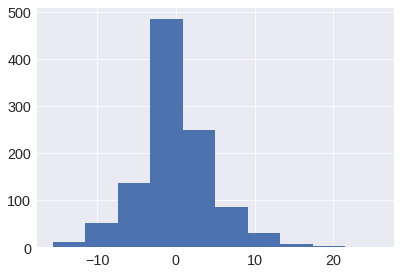

In [58]:
sb.plt.hist(flat_list)

## Clustering

In [38]:
tad_enhs = []

for e in df.index:
    chrom = e.split(':')[0]
    start,stop = e.split(':')[1].split('-')
    tad_enhs.append((chrom, start, stop))

In [41]:
tad_enhs_df = pd.DataFrame(tad_enhs)
tad_enhs_df.to_csv('/home/shared/Data/encode/mouse/enhancer/tad_overlapped_enh.bed',sep='\t',index=None,header=None)

In [124]:
count = 0
all_out_df = pd.DataFrame()
for indx,file in enumerate(files):
    tad = file.split('/')[-1]
    
    if indx == 0:
        tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file))
    else:
        n_tad_files =[]
        for f in tad_files:
            path = f.split('/')
            path[-2] = tad
            path = ('/'.join(path))
            n_tad_files.append(path)
    out_df = pd.DataFrame()
    for indx,c in enumerate(tad_files):
        context = c.split('/')[-1].split('_enh')[0]
        enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        indx_names = enh_gene.index
        col_names = enh_gene.columns
        R,C = np.where(enh_gene>0)
        
        out_arr = np.column_stack((['-'.join(i) for i in list(zip(indx_names[R],col_names[C]))],enh_gene.values[R,C]))
        c_df = pd.DataFrame(out_arr,columns=[['Enh-Gene',context]])
        c_df.set_index('Enh-Gene',inplace=True)
        out_df = pd.concat([out_df,c_df],axis=1)
    all_out_df = pd.concat([all_out_df,out_df],axis=0)
    
    


In [ ]:
def get_tad_enh_gene_dfs(file)
    tad = file.split('/')[-1]
    tad_files = glob.glob('{}/*_enh_gene_weight.txt'.format(file))
    out_df = pd.DataFrame()
    for indx,c in enumerate(tad_files):
        context = c.split('/')[-1].split('_enh')[0]
        enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        indx_names = enh_gene.index
        col_names = enh_gene.columns
        R,C = np.where(enh_gene>0)
        
        out_arr = np.column_stack((['-'.join(i) for i in list(zip(indx_names[R],col_names[C]))],enh_gene.values[R,C]))
        c_df = pd.DataFrame(out_arr,columns=[['Enh-Gene',context]])
        c_df.set_index('Enh-Gene',inplace=True)
        out_df = pd.concat([out_df,c_df],axis=1)
    return out_df

In [126]:
enh_gene_network = all_out_df.fillna(0)

In [213]:
sb.set_style('white')
sb.set_context('poster',font_scale=1)
dist = scipy.spatial.distance.pdist(enh_gene_network.T)
link = scipy.cluster.hierarchy.linkage(dist,method='complete')

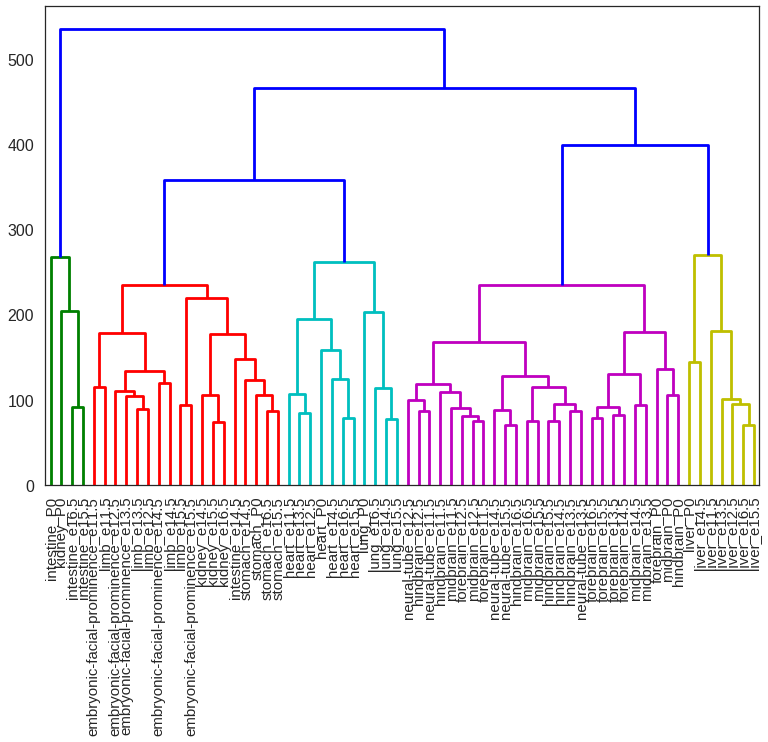

In [214]:
scipy.cluster.hierarchy.dendrogram(link,labels=enh_gene_network.columns,leaf_font_size=15,color_threshold=300)
sb.plt.xlabel('')

In [215]:
hdf = pd.HDFStore('/home/shared/Data/encode/mouse/Enh_Gene_Networks_Dfs.h5')
hdf['/raw_enh_gene_weight'] = enh_gene_network
hdf.close()

/home/vamin/softwares/anaconda2/envs/py34/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2881: PerformanceWarning:


your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->['midbrain_e12.5', 'heart_e13.5', 'forebrain_e16.5', 'embryonic-facial-prominence_e11.5', 'embryonic-facial-prominence_e13.5', 'heart_e12.5', 'forebrain_P0', 'intestine_e16.5', 'midbrain_e16.5', 'midbrain_P0', 'liver_e16.5', 'limb_e13.5', 'embryonic-facial-prominence_e12.5', 'kidney_e14.5', 'lung_e16.5', 'neural-tube_e15.5', 'liver_e12.5', 'midbrain_e15.5', 'intestine_e14.5', 'heart_e11.5', 'limb_e11.5', 'heart_P0', 'hindbrain_e13.5', 'liver_e11.5', 'forebrain_e15.5', 'midbrain_e14.5', 'stomach_P0', 'hindbrain_e11.5', 'forebrain_e12.5', 'kidney_P0', 'forebrain_e13.5', 'forebrain_e11.5', 'midbrain_e11.5', 'lung_P0', 'kidney_e15.5', 'liver_e15.5', 'heart_e16.5', 'liver_P0', 'hindbrain_e15.5', 'heart_

In [216]:
enh_gene_network.to_csv('Enh_Gene_Network_DF_raw_weight.txt',sep='\t')

In [218]:
def get_tad_enh_gene_dfs(file):
    tad = file.split('/')[-1]
    tad_files = glob.glob('{}/*enh_gene_weight_minus_expected_tanh.txt'.format(file))
    out_df = pd.DataFrame()
    for indx,c in enumerate(tad_files):
        context = c.split('/')[-1].split('_enh')[0]
        enh_gene = pd.read_csv(c,sep='\t',index_col=0)
        indx_names = enh_gene.index
        col_names = enh_gene.columns
        R,C = np.where(enh_gene>0)
        
        out_arr = np.column_stack((['-'.join(i) for i in list(zip(indx_names[R],col_names[C]))],enh_gene.values[R,C]))
        c_df = pd.DataFrame(out_arr,columns=[['Enh-Gene',context]])
        c_df.set_index('Enh-Gene',inplace=True)
        out_df = pd.concat([out_df,c_df],axis=1)
    return out_df

In [226]:
out = p.map(get_tad_enh_gene_dfs, files)

In [227]:
dev_enh_gene_network = pd.concat(out,axis=0)

In [229]:
dev_enh_gene_network = dev_enh_gene_network.fillna(0)

In [230]:
sb.set_style('white')
sb.set_context('poster',font_scale=1)
dist = scipy.spatial.distance.pdist(dev_enh_gene_network.T)
link = scipy.cluster.hierarchy.linkage(dist,method='complete')

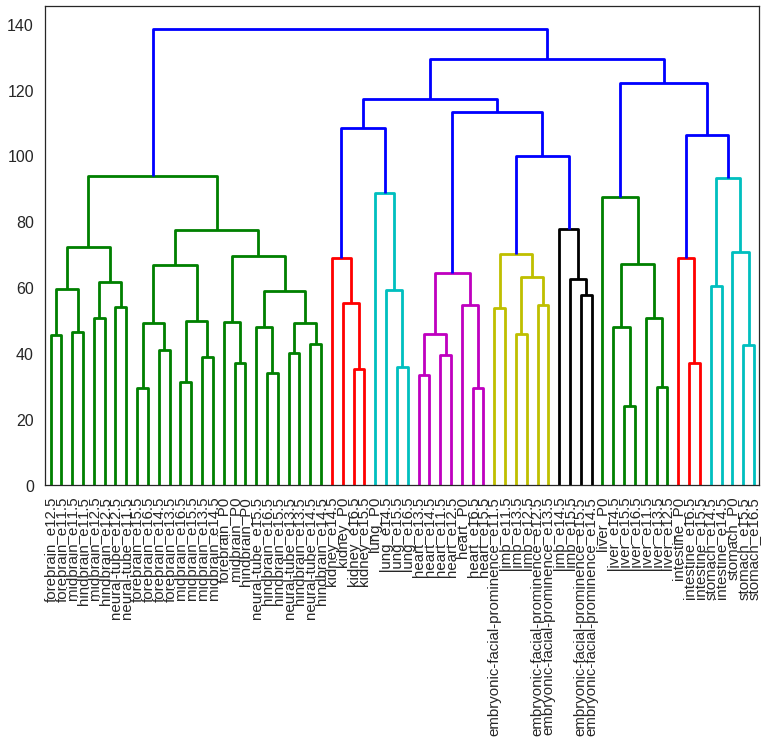

In [232]:
scipy.cluster.hierarchy.dendrogram(link,labels=dev_enh_gene_network.columns,leaf_font_size=15)
sb.plt.xlabel('')

In [235]:
exp = pd.read_csv('/home/shared/Data/encode/mouse/gene_expression_log2TPM_signal_processed_matrix.txt',sep='\t',index_col=0)

In [241]:
labels = []
for i in exp.columns:
    ids = i.split('_')
    labels.append('_'.join(ids[:2]))

In [243]:
exp.columns = labels

In [246]:
exp.shape

(21993, 318)

In [250]:
labels_set = list(set(labels))

In [ ]:
exp.me

In [259]:
all_mean_df = []
for i in labels_set:
    out = pd.DataFrame(exp.ix[:,i].mean(axis=1))
    out.columns = [i]
    all_mean_df.append(out)


In [261]:
avg_exp = pd.concat(all_mean_df,axis=1)

In [262]:
sb.set_style('white')
sb.set_context('poster',font_scale=1)
dist = scipy.spatial.distance.pdist(avg_exp.T)
link = scipy.cluster.hierarchy.linkage(dist,method='complete')

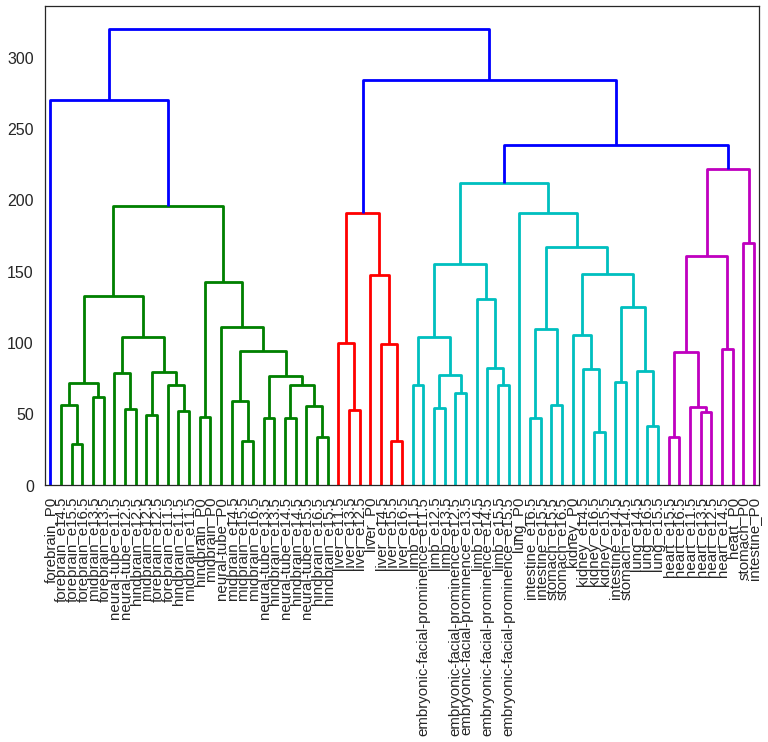

In [263]:
scipy.cluster.hierarchy.dendrogram(link,labels=avg_exp.columns,leaf_font_size=15)
sb.plt.xlabel('')